<h1 align = 'center'>INDEPENDENT COMPONENT ANALYSIS AND IT'S APPLICATIONS TO DISTINGUISH THE SOUNDS MUSICAL INSTRUMENTS

This Project is created as a part of the Academic Currciculum Project for the Machine Learning Course (CS331). This project is created by the following team members.
1. Somesh Agrawal
2. Raj Hans Khoiwal
3. Aniket Chaudhri
4. Adarsh Anand

## Table of Content
1. What is Independent Component Analysis?
2. Mathematics and Concepts behind ICA
3. Applications of ICA
4. Our Application to ICA
5. Introducing the Dataset
6. Visualization of Audio Files
7. Listening the Audio Files
8. Applying FastICA to get the Desired Results
9. Final Results

# What is Independent Component Analysis?

**<big>Independent Component Analysis (ICA)</big> is a statistical method used to separate a multivariate signal into independent, non-Gaussian components. In simpler terms, ICA can be used to separate a mixed signal into its individual source components based on the statistical properties of each source**

For example, imagine you have a recording of a band playing several instruments together, and you want to separate the audio into separate tracks for each instrument. ICA could be used to separate the mixed audio signal into independent components, each corresponding to a different instrument, based on the statistical properties of the audio data.

ICA works by assuming that the mixed signal is a linear combination of the independent source signals, and then using mathematical techniques to estimate the original sources. This estimation process is based on finding a set of basis functions (called "independent components") that capture the underlying statistical properties of the source signals.

# Mathematical Concepts Behind ICA

We define our sound source (S) as a list of independent sources and we also define a mixing matrix (A) which defines the ratio in which the sources are combining linearly. Hence the resultant mixed sound (X) is the linear combination of the independent sound sources defined in S.


                                                        X = AS

                                                X -> Observed Signal
                                                A -> Mixing Matrix
                                                S -> Source Signals
                                        
Then , according to above defined scheme we can retrieve the source signals again from the mixed signals by multiplying X with the inverse of A:

                                                X = A S
                                                A_inverse X = S

Hence in order to get the source signal we need to calculate the inverse of A.


# Preconditions for ICA to work

1. The mixed signals are only a linear combination of any number of source signals.
2. The source signals should be independent (i.e. Covariance is 0).
3. The independent components should be non-Gaussian.

# Preprocessing Steps
1. Centering - Involves subtraction of the mean from our input X which simplifies the ICA calculation and the mean can later be added back.
2. Whitening - 

# Applications of ICA

Independent Component Analysis (ICA) has a wide range of applications in signal processing, data analysis, and machine learning. Here are some examples of how ICA can be used in various fields:

1. **Audio Processing**: ICA can be used to separate mixed audio signals into individual tracks corresponding to different sources, such as separating vocals from music, or isolating specific instruments from a band recording.

2. **Image Processing**: ICA can be used to separate mixed images into individual components, such as separating a face from a background or extracting text from a document.

3. **Biomedical Signal Processing**: ICA can be used to separate complex signals in biomedical data, such as separating brain activity signals from electroencephalogram (EEG) recordings, or identifying different heartbeats from electrocardiogram (ECG) signals.

4. **Finance**: ICA can be used to identify underlying factors that contribute to financial data, such as identifying trends in stock prices or separating mixed signals in financial time series data.


# Our Application or Project Detail to ICA

ICA can be used to separate mixed audio signals into individual tracks corresponding to different sources, such as separating vocals from music, or isolating specific instruments from a band recording.

In this notebook, we'll use Independent Component Analysis to **retrieve original Audio Signals** from three observations each of which contains a **different mix of the original Audio Signals signals**.

In [38]:
# Importing the necessary libraries
import IPython
import numpy as np
import wave
import matplotlib.pyplot as plt

In [39]:
wave_mix_1 = wave.open('SoundMix_Observer1.wav','r')
wave_mix_1.getparams()

_wave_params(nchannels=1, sampwidth=2, framerate=44100, nframes=264515, comptype='NONE', compname='not compressed')

In [40]:
!pip3 install --upgrade wave


[notice] A new release of pip available: 22.1.2 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
# Extract Raw Audio Data from Wav File

# Read all the audio frames and store the resulting byte string 
raw_signal_1 = wave_mix_1.readframes(-1)

# Convert the byte string into a NumPy array of 16-bit integers 
signal_1 = np.fromstring(raw_signal_1, 'int16')
signal_1

C:\Users\rajha\AppData\Local\Temp\ipykernel_9860\2943517707.py:7: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  signal_1 = np.fromstring(raw_signal_1, 'int16')


array([  879,  1268,  1460, ...,  9204,  9553, 10006], dtype=int16)

In [42]:
'length: ', len(signal_1) , 'first 100 elements: ',signal_1[:100]

('length: ',
 264515,
 'first 100 elements: ',
 array([  879,  1268,  1460,  1756,  1943,  2216,  2407,  2668,  2866,
         3106,  3308,  3546,  3752,  3981,  4175,  4395,  4588,  4790,
         4966,  5146,  5292,  5436,  5550,  5643,  5717,  5759,  5790,
         5798,  5789,  5756,  5713,  5649,  5576,  5478,  5381,  5267,
         5146,  4999,  4856,  4682,  4502,  4308,  4097,  3875,  3637,
         3380,  3107,  2825,  2514,  2194,  1847,  1472,  1087,   671,
          227,  -219,  -691, -1176, -1666, -2167, -2669, -3179, -3668,
        -4170, -4643, -5116, -5559, -5985, -6380, -6765, -7105, -7422,
        -7706, -7955, -8163, -8339, -8470, -8557, -8600, -8618, -8585,
        -8524, -8425, -8298, -8129, -7947, -7720, -7475, -7205, -6916,
        -6606, -6266, -5922, -5556, -5165, -4774, -4353, -3922, -3476,
        -3021], dtype=int16))

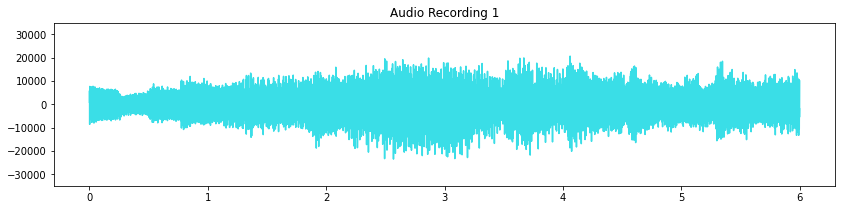

In [43]:
frameRate = wave_mix_1.getframerate()
timings = np.linspace(0, len(signal_1)/frameRate, num=len(signal_1))


plt.figure(figsize=(14,3))
plt.title('Audio Recording 1')
plt.plot(timings,signal_1, c="#3ADEE7")
plt.ylim(-35000, 35000)
plt.show()

In [44]:
#Extract Raw Audio from Wav File 2
wave_mix_2 = wave.open('SoundMix_Observer2.wav','r')
raw_signal_2 = wave_mix_2.readframes(-1)
signal_2 = np.fromstring(raw_signal_2, 'int16')


#Extract Raw Audio from Wav File 3
wave_mix_3 = wave.open('SoundMix_Observer3.wav','r')
raw_signal_3 = wave_mix_3.readframes(-1)
signal_3 = np.fromstring(raw_signal_3, 'int16')

C:\Users\rajha\AppData\Local\Temp\ipykernel_9860\2791281173.py:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  signal_2 = np.fromstring(raw_signal_2, 'int16')
C:\Users\rajha\AppData\Local\Temp\ipykernel_9860\2791281173.py:10: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  signal_3 = np.fromstring(raw_signal_3, 'int16')


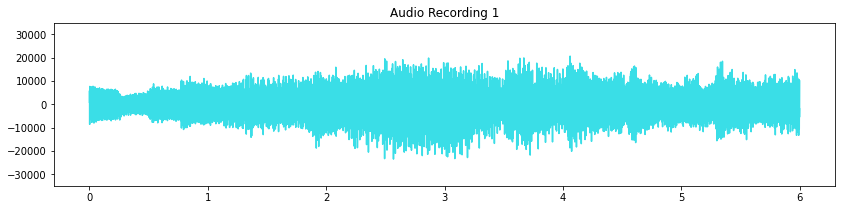

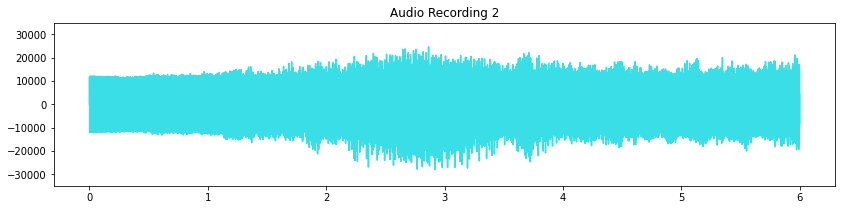

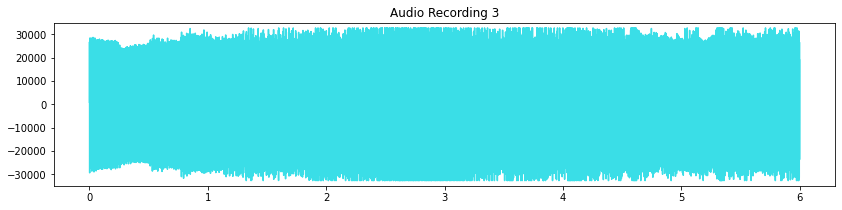

In [45]:
# Waveforms for Different Audio Signals
plt.figure(figsize=(14,3))
plt.title('Audio Recording 1')
plt.plot(timings,signal_1, c="#3ADEE7")
plt.ylim(-35000, 35000)
plt.show()


plt.figure(figsize=(14,3))
plt.title('Audio Recording 2')
plt.plot(timings,signal_2, c="#3ADEE7")
plt.ylim(-35000, 35000)
plt.show()

plt.figure(figsize=(14,3))
plt.title('Audio Recording 3')
plt.plot(timings,signal_3, c="#3ADEE7")
plt.ylim(-35000, 35000)
plt.show()

In [46]:
IPython.display.Audio("SoundMix_Observer1.wav")

In [47]:
IPython.display.Audio("SoundMix_Observer2.wav")

In [48]:
IPython.display.Audio("SoundMix_Observer3.wav")

In [49]:
X = list(zip(signal_1, signal_2, signal_3))

# Let's peak at what X looks like
X[:10]

[(879, 157, 879),
 (1268, 899, 2584),
 (1460, 1610, 4081),
 (1756, 2325, 5682),
 (1943, 3022, 7147),
 (2216, 3718, 8689),
 (2407, 4386, 10114),
 (2668, 5056, 11583),
 (2866, 5690, 12954),
 (3106, 6318, 14327)]

# Implementation of FastICA Algorithm

1. Aim is to optimize W (W = A_inverse) in a way that the resulting signals of Wx are as non-Gaussian as possible. 
2. The Contrast Function (measures independence) for the algorithm is chosen as 


      <img src= "image1.webp" alt="Contrast Function" />

<br>

3. Algorithm using fixed-point iteration scheme


      <img src="image2.webp" alt="Contrast Function" />



In [50]:
from sklearn.decomposition import FastICA

# Initializing FastICA with n_components = 3
ica = FastICA(n_components = 3)

# Running the FastICA algorithm using fit_transform on dataset X
ica_result = ica.fit_transform(X)

In [51]:
ica_result.shape

(264515, 3)

In [52]:
# Seperating the Independent Components

result_signal_1 = ica_result[:,0]
result_signal_2 = ica_result[:,1]
result_signal_3 = ica_result[:,2]

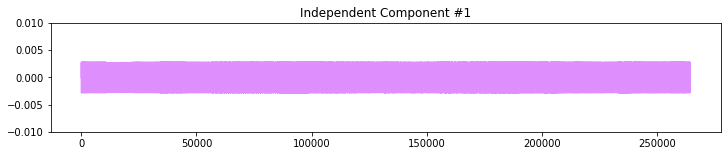

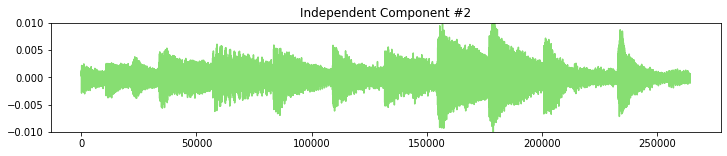

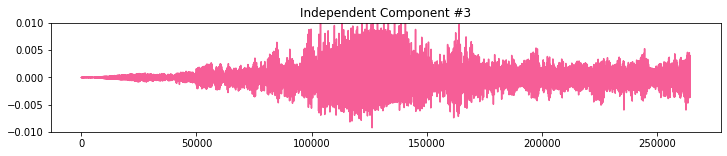

In [53]:
# Independent Component #1
plt.figure(figsize=(12,2))
plt.title('Independent Component #1')
plt.plot(result_signal_1, c="#df8efd")
plt.ylim(-0.010, 0.010)
plt.show()

# Independent Component #2
plt.figure(figsize=(12,2))
plt.title('Independent Component #2')
plt.plot(result_signal_2, c="#87de72")
plt.ylim(-0.010, 0.010)
plt.show()

# Independent Component #3
plt.figure(figsize=(12,2))
plt.title('Independent Component #3')
plt.plot(result_signal_3, c="#f65e97")
plt.ylim(-0.010, 0.010)
plt.show()

In [54]:
from scipy.io import wavfile

# Converting to int, mapping the appropriate range, and increasing the volume a little bit
result_signal_1_int = np.int16(result_signal_1*32767*100)
result_signal_2_int = np.int16(result_signal_2*32767*100)
result_signal_3_int = np.int16(result_signal_3*32767*100)

# Writing wave files
wavfile.write("result_signal_1.wav", frameRate, result_signal_1_int)
wavfile.write("result_signal_2.wav", frameRate, result_signal_2_int)
wavfile.write("result_signal_3.wav", frameRate, result_signal_3_int)

In [55]:
IPython.display.Audio("result_signal_1.wav")

In [56]:
IPython.display.Audio("result_signal_2.wav")

In [57]:
IPython.display.Audio("result_signal_3.wav")